In [5]:
import numpy as np
import matplotlib.pyplot as plt
from generation_parameters import get_params
from db_config import DBConfig
from mpl_toolkits.mplot3d import Axes3D
import pickle


In [4]:
with open('db_config_synthgen.obj', 'rb') as file:
    db_config = pickle.load(file)

In [17]:
test_sim_pickle = '/scratch/ci411/DCASE_GEN/tau_srir/rirs_01_bomb_shelter.pkl'
with open(test_sim_pickle, 'rb') as f:
    testload = pickle.load(f)
testload[0][0].shape

(7200, 4, 360)

In [16]:
test_sim_pickle = '/scratch/ci411/DCASE_GEN/sim_rirs/rirs_01_bomb_shelter.pkl'
with open(test_sim_pickle, 'rb') as f:
    testload = pickle.load(f)
testload[0][0].shape

(7200, 4, 360)

In [13]:
rooms = list(db_config._measinfo.keys())

In [4]:
#iterate through all trajectories and provide room info/mic position/trajectory
path_dict = {}
for room_idx in range(len(rooms)):
    room = rooms[room_idx]
    print("Processing {}".format(room))
    trajs = db_config._measinfo[room]['trajectories']
    heights = db_config._measinfo[room]['heights'][0]
    dists = db_config._measinfo[room]['distances']
    traj_type = db_config._measinfo[room]['trajectory_type']
    paths = db_config._rirdata[room_idx][0][2]
    
    path_list = []
    
    for t_idx in range(len(trajs)):
        for h_idx in range(len(heights)):
            if traj_type == 'circular':
                dist = dists[0][t_idx]
            elif traj_type =='linear':
                dist = dists[:,:,t_idx]
            path = paths[t_idx, h_idx][0]
            traj = trajs[t_idx]
            height = heights[h_idx]
            path_tuple = (path, (traj, height, dist))
            path_list.append(path_tuple)
    path_dict[room] = path_list


Processing bomb_shelter
Processing gym
Processing pb132
Processing pc226
Processing sa203
Processing sc203
Processing se203
Processing tb103
Processing tc352


In [5]:
def map_to_cylinder(path, rad, axis=2):
    #maps points (unit vecs) to cylinder of known radius along axis (default z/2)
    scaled_path = np.empty(path.shape)
    rad_axes = [0,1,2]
    rad_axes.remove(axis)
    for i in range(path.shape[0]):
        vec = path[i]
        scale_rad = np.sqrt(np.sum([vec[j]**2 for j in rad_axes]))
        scale = rad / scale_rad
        scaled_path[i] = vec * scale
    return scaled_path
    

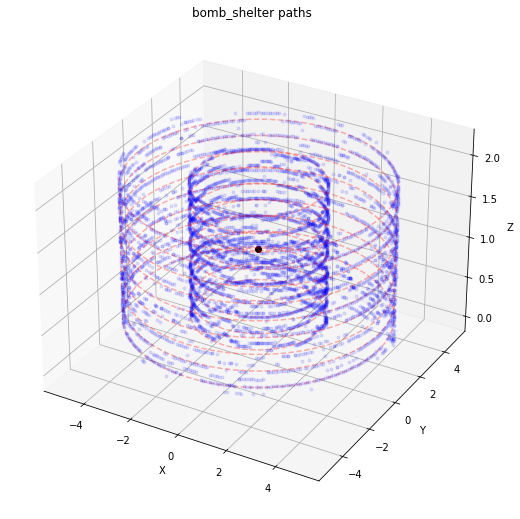

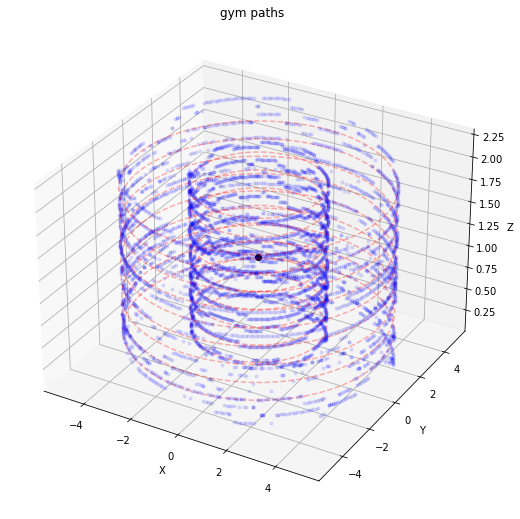

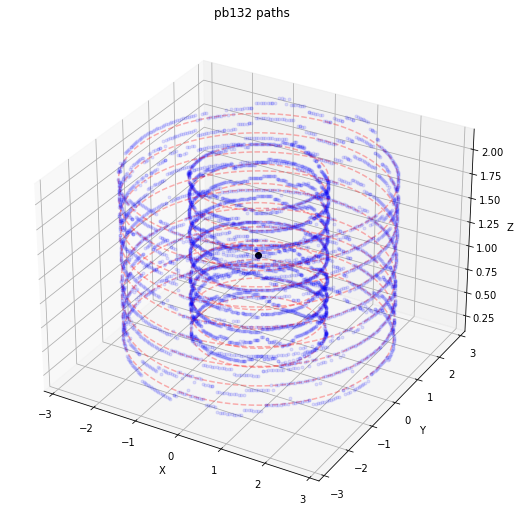

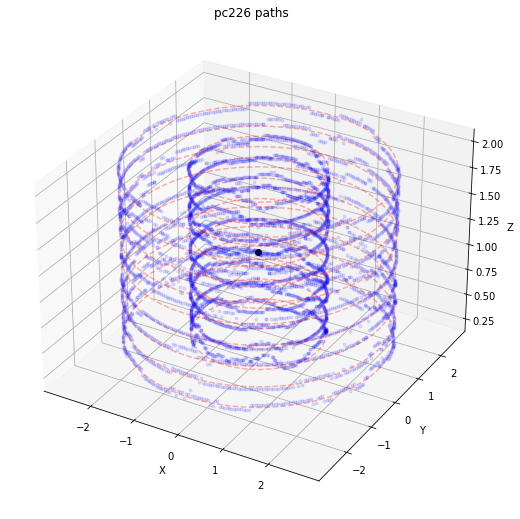

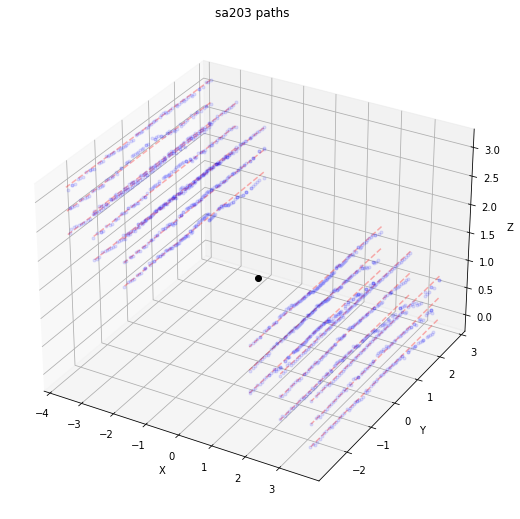

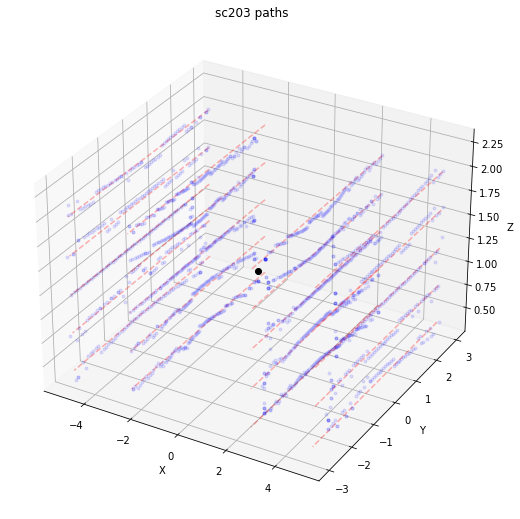

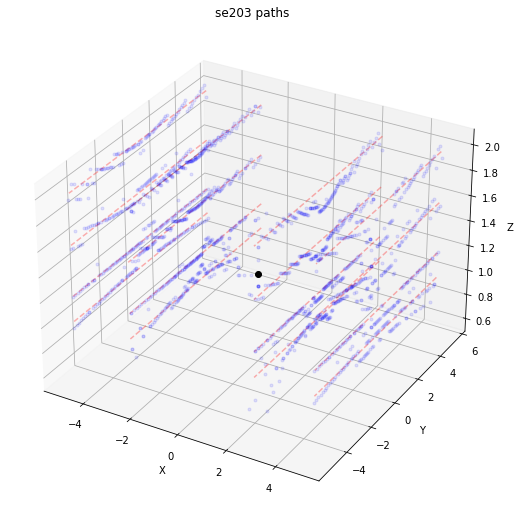

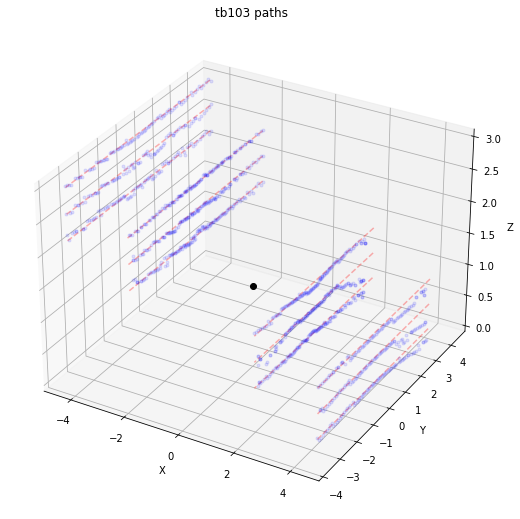

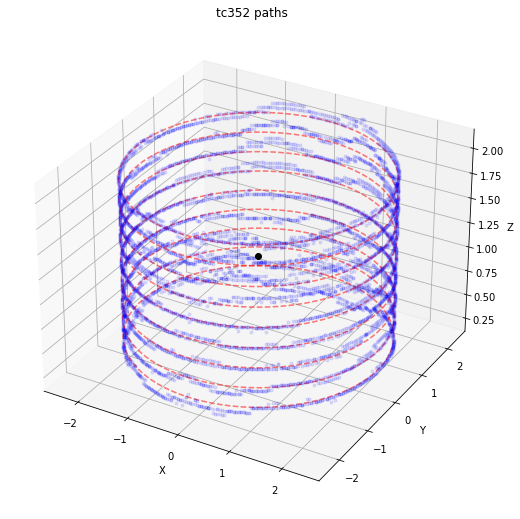

In [6]:
for room in rooms:
    paths = path_dict[room]
    mic_pos = db_config._measinfo[room]['mic_position'][0]
    ax = plt.figure(figsize=(9,9)).add_subplot(projection='3d')
    ax.set_title("{} paths".format(room))
    ax.plot(mic_pos[0], mic_pos[1], mic_pos[2], marker='o', color='k',\
            linestyle='none', label='Mic Position')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    for path, (traj, height, dist) in paths:
        path_label = "{} {:.1f}".format(traj, height)
        #dist from z axis, might need to fix
        
        if type(dist) == np.ndarray:
            z_offset = height - mic_pos[2]
            rad = np.sqrt(dist[0][0]**2 + (dist[0][2]+z_offset)**2)
            true_path = np.array([point for point in dist])
            #scale = np.sqrt(np.sum(dist[0]**2))
            scaled_path = map_to_cylinder(path, rad, axis=1)
            centered_path = scaled_path + mic_pos

        else:
            true_path = np.array([[dist*np.sin(t), dist*np.cos(t), 0] for t in np.linspace(0, 2*np.pi, 100)])
            #avg_z = np.average(path[:,2])
            #theta = np.arccos(avg_z)
            #centered_path = (path*dist) + mic_pos#not 100# true
            scaled_path = map_to_cylinder(path, dist, axis=2)
            centered_path =scaled_path + mic_pos

        ax.plot(true_path[:,0], true_path[:,1], true_path[:,2] + height, 'r--', alpha=.3)
        ax.plot(centered_path[:,0], centered_path[:,1], centered_path[:,2], 'b.', alpha=.1, label=path_label)

    
    #ax.legend()


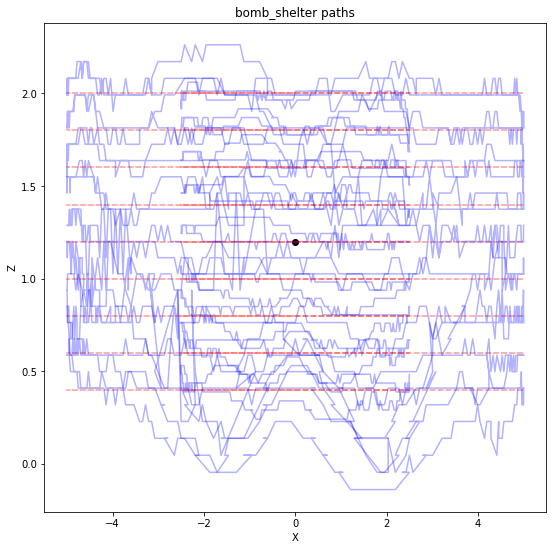

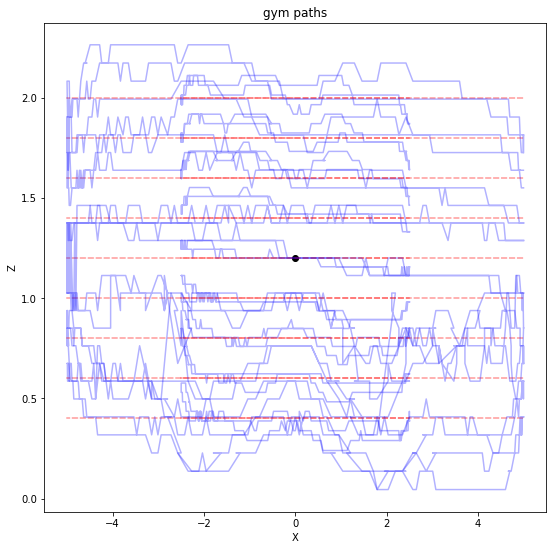

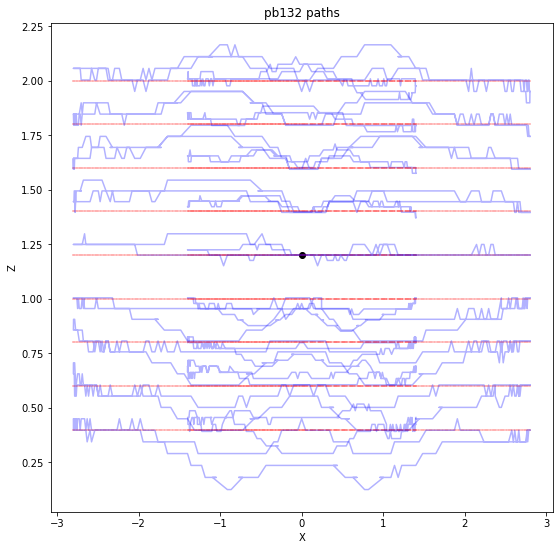

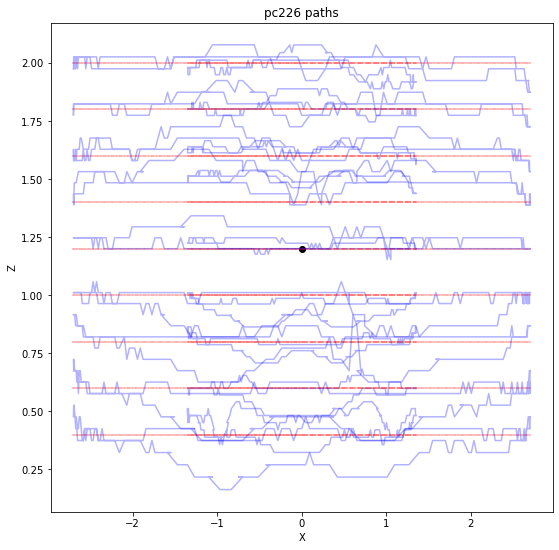

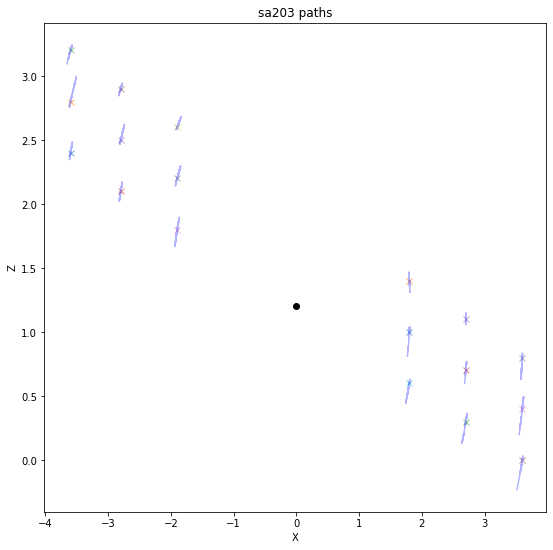

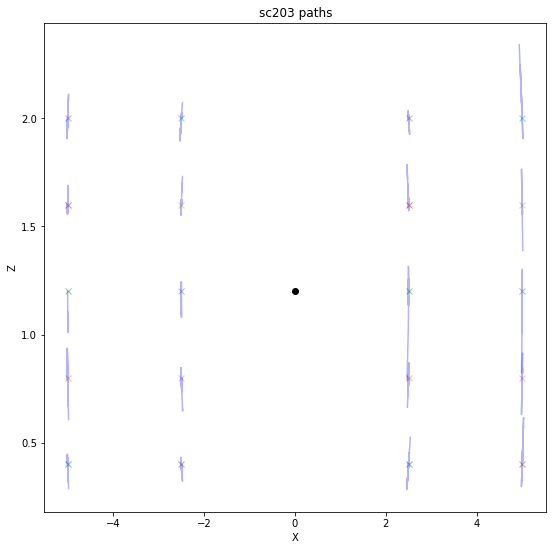

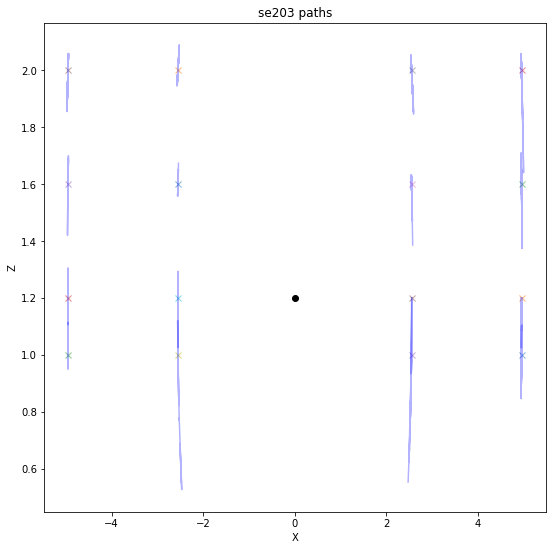

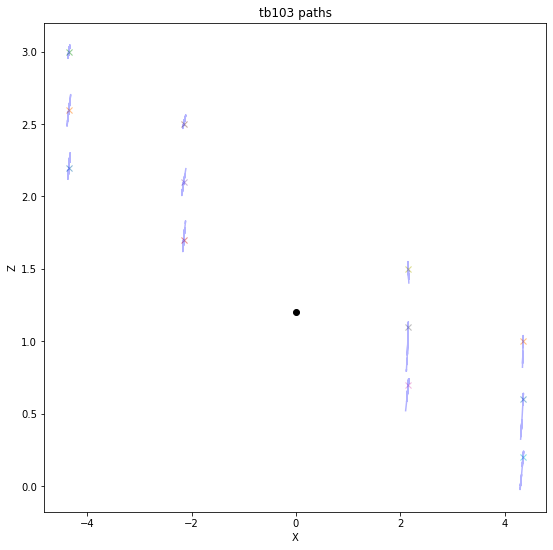

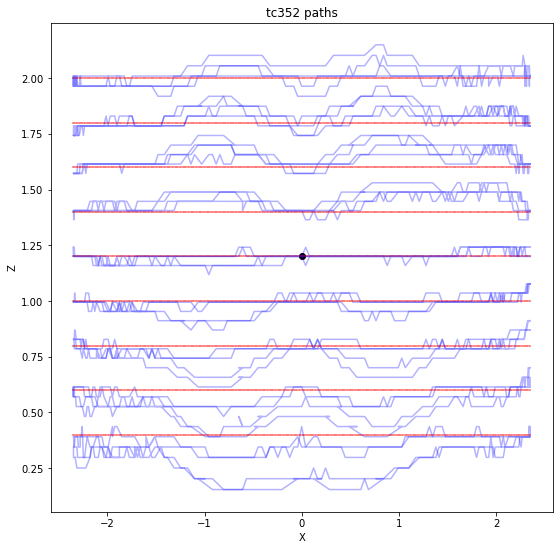

In [7]:
for room in rooms:
    paths = path_dict[room]
    mic_pos = db_config._measinfo[room]['mic_position'][0]
    ax = plt.figure(figsize=(9,9)).gca()
    ax.set_title("{} paths".format(room))
    ax.plot(mic_pos[0], mic_pos[2], marker='o', color='k',\
            linestyle='none', label='Mic Position')
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.plot
    for path, (traj, height, dist) in paths:
        path_label = "{} {:.1f}".format(traj, height)
        #dist from z axis, might need to fix
        
        if type(dist) == np.ndarray:
            true_path = np.array(dist)
            z_offset = height - mic_pos[2]
            rad = np.sqrt(dist[0][0]**2 + (dist[0][2]+z_offset)**2)
            #scale = np.sqrt(np.sum(dist[0]**2))
            scaled_path = map_to_cylinder(path, rad, axis=1)
            centered_path = scaled_path + mic_pos
            ax.plot(true_path[:,0], true_path[:,2] + height, 'x', alpha=.3)


        else:
            true_path = np.array([[dist*np.sin(t), dist*np.cos(t), 0] for t in np.linspace(0, 2*np.pi, 100)])
            #avg_z = np.average(path[:,2])
            #theta = np.arccos(avg_z)
            #centered_path = (path*dist) + mic_pos#not 100# true
            scaled_path = map_to_cylinder(path, dist, axis=2)
            centered_path =scaled_path + mic_pos
        ax.plot(true_path[:,0], true_path[:,2] + height, 'r--', alpha=.3)
        ax.plot(centered_path[:,0], centered_path[:,2], 'b-', alpha=.3, label=path_label)


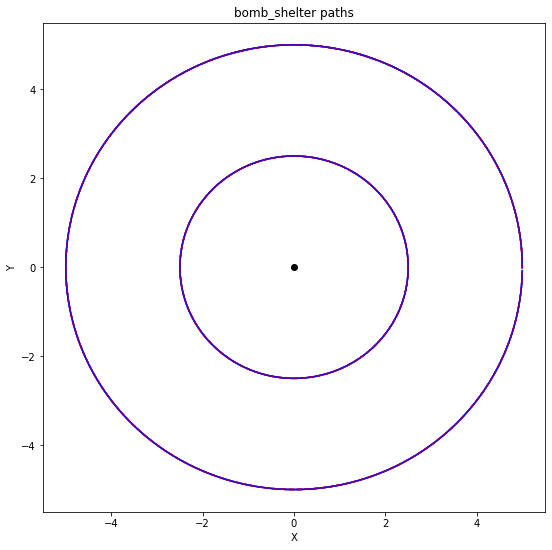

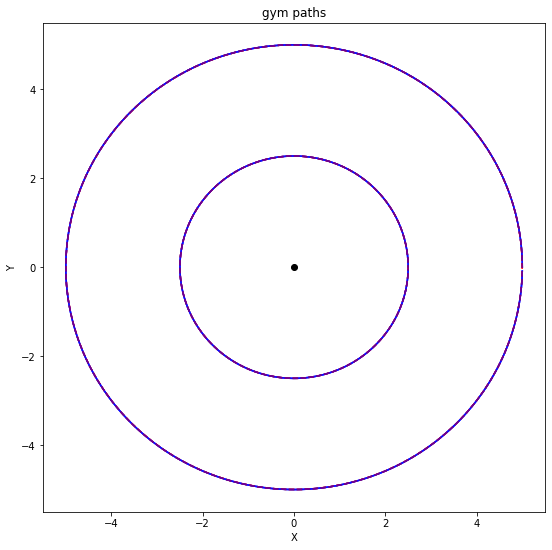

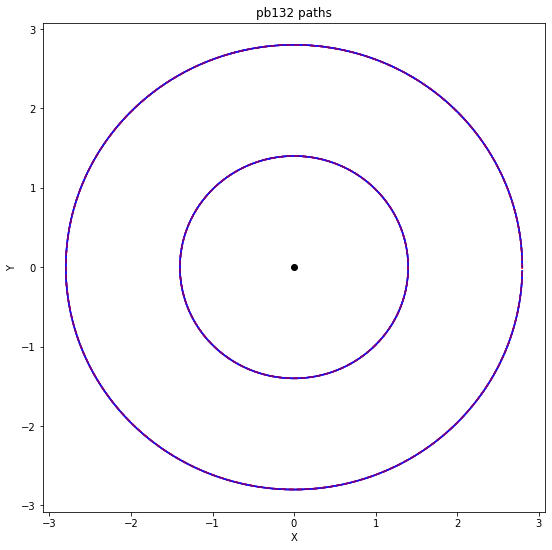

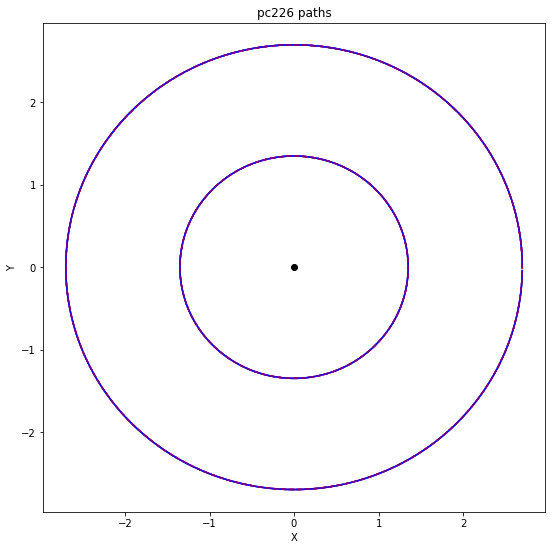

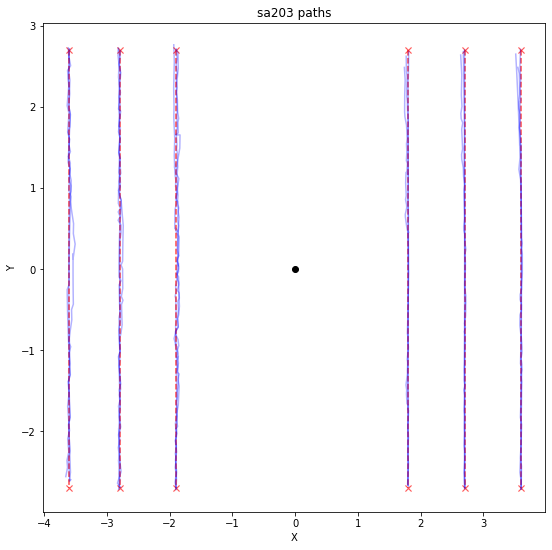

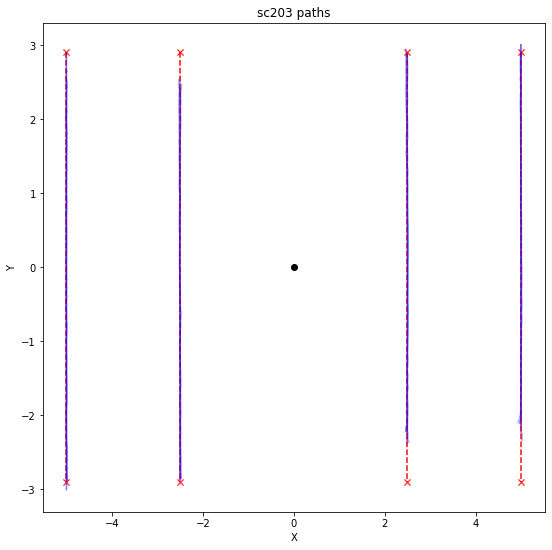

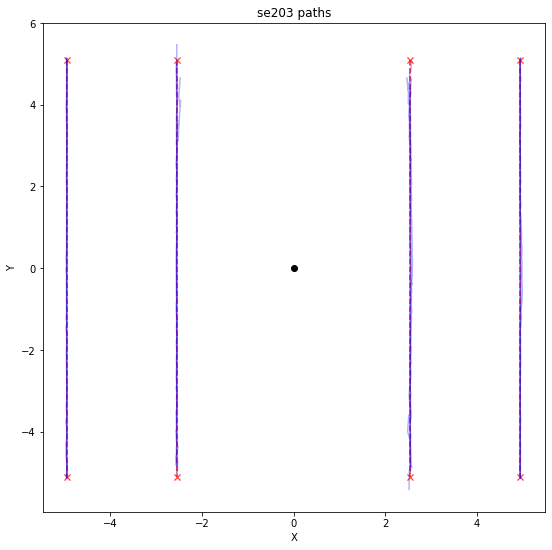

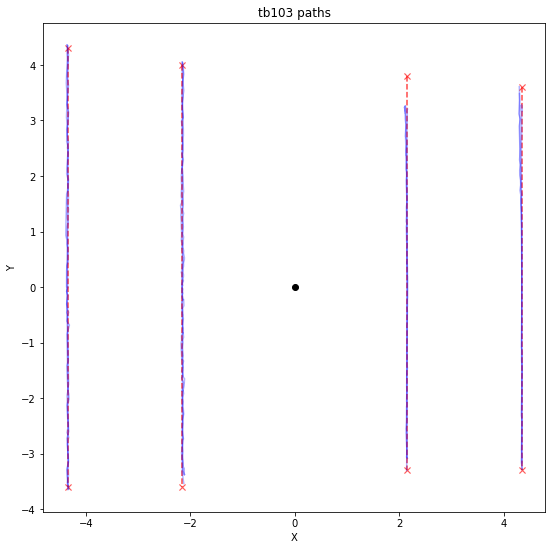

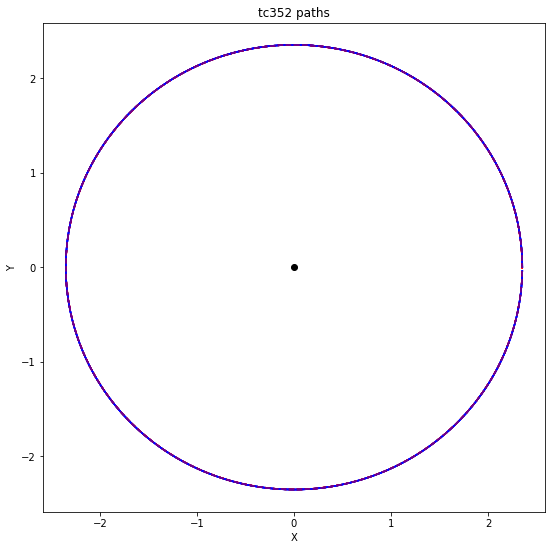

In [8]:
for room in rooms:
    paths = path_dict[room]
    mic_pos = db_config._measinfo[room]['mic_position'][0]
    ax = plt.figure(figsize=(9,9)).gca()
    ax.set_title("{} paths".format(room))
    ax.plot(mic_pos[0], mic_pos[1], marker='o', color='k',\
            linestyle='none', label='Mic Position')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for path, (traj, height, dist) in paths:
        path_label = "{} {:.1f}".format(traj, height)
        #dist from z axis, might need to fix
        
        if type(dist) == np.ndarray:
            z_offset = height - mic_pos[2]
            rad = np.sqrt(dist[0][0]**2 + (dist[0][2]+z_offset)**2)
            true_path = np.array([point for point in dist])
            #scale = np.sqrt(np.sum(dist[0]**2))
            scaled_path = map_to_cylinder(path, rad, axis=1)
            centered_path = scaled_path + mic_pos
            ax.plot(true_path[:,0], true_path[:,1], 'rx', alpha=.3)


        else:
            true_path = np.array([[dist*np.sin(t), dist*np.cos(t), 0] for t in np.linspace(0, 2*np.pi, 100)])
            #avg_z = np.average(path[:,2])
            #theta = np.arccos(avg_z)
            #centered_path = (path*dist) + mic_pos#not 100# true
            scaled_path = map_to_cylinder(path, dist, axis=2)
            centered_path =scaled_path + mic_pos

        ax.plot(true_path[:,0], true_path[:,1], 'r--', alpha=.3)
        ax.plot(centered_path[:,0], centered_path[:,1], 'b-', alpha=.3, label=path_label)

In [9]:
rooms

['bomb_shelter',
 'gym',
 'pb132',
 'pc226',
 'sa203',
 'sc203',
 'se203',
 'tb103',
 'tc352']

In [10]:
def unitvec_to_cartesian(path_unitvec, height, dist, mic_pos):
    if type(dist) == np.ndarray:
        z_offset = height - mic_pos[2]
        rad = np.sqrt(dist[0][0]**2 + (dist[0][2]+z_offset)**2)
        scaled_path = map_to_cylinder(path_unitvec, rad, axis=1)
        centered_path = scaled_path + mic_pos
    else:    
        scaled_path = map_to_cylinder(path_unitvec, dist, axis=2)
        centered_path = scaled_path + mic_pos
    return centered_path

def load_paths(room_idx, db_config):
    rooms = ['bomb_shelter', 'gym', 'pb132', 'pc226', 'sa203', 'sc203', 'se203', 'tb103', 'tc352']
    room = rooms[room_idx]
    trajs = db_config._measinfo[room]['trajectories']
    heights = db_config._measinfo[room]['heights'][0]
    dists = db_config._measinfo[room]['distances']
    traj_type = db_config._measinfo[room]['trajectory_type']
    mic_pos = db_config._measinfo[room]['mic_position'][0]
    paths = db_config._rirdata[room_idx][0][2]
    output_paths = np.empty(paths.shape, dtype=object)
    path_metadata = np.empty(paths.shape, dtype=object)
    room_metadata = {'room': room, 'trajectory_type': traj_type, 'microphone_position': mic_pos}
    for i, traj in enumerate(trajs):
        for j, height in enumerate(heights):
            
            if traj_type == 'circular':
                dist = dists[0][i]
            elif traj_type =='linear':
                dist = dists[:,:,i]
            
            path_unitvec = paths[i,j][0]
            path_dict = {'trajectory': traj, 'height': height}
            path_cartesian = unitvec_to_cartesian(path_unitvec, height, dist, mic_pos)
            output_paths[i,j] = path_cartesian
            path_metadata[i,j] = path_dict
            
    return output_paths, path_metadata, room_metadata

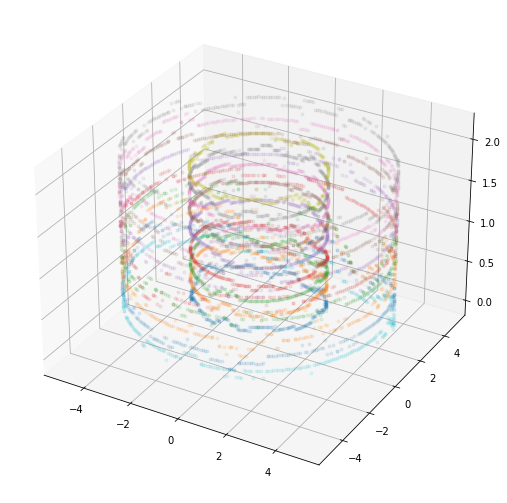

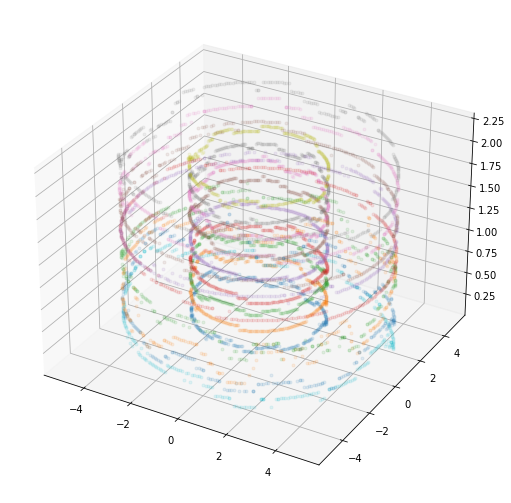

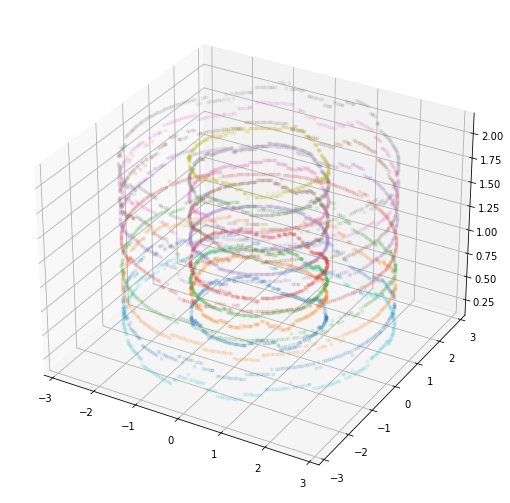

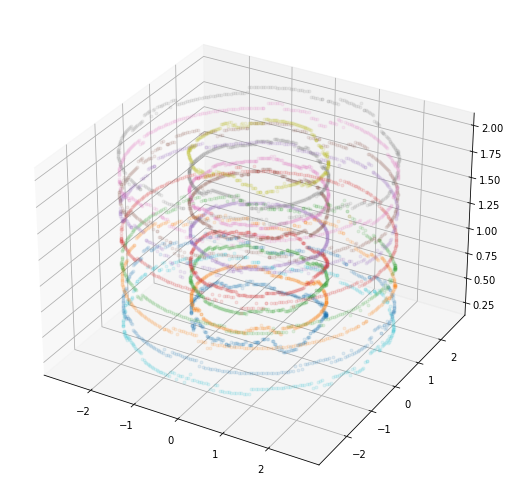

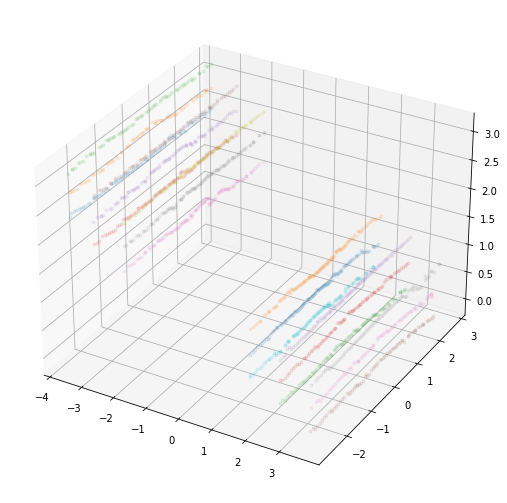

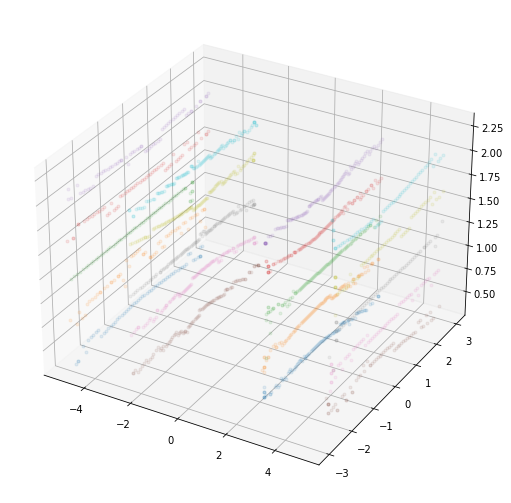

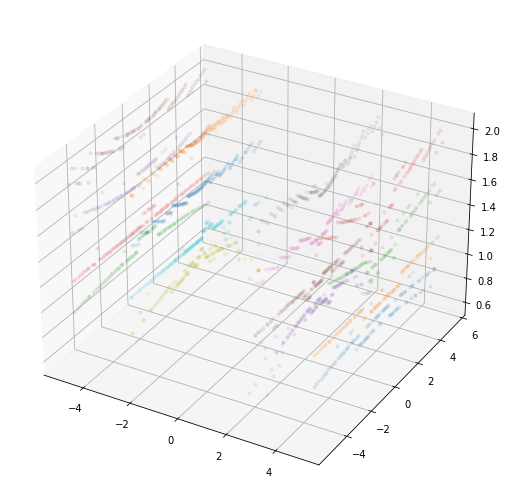

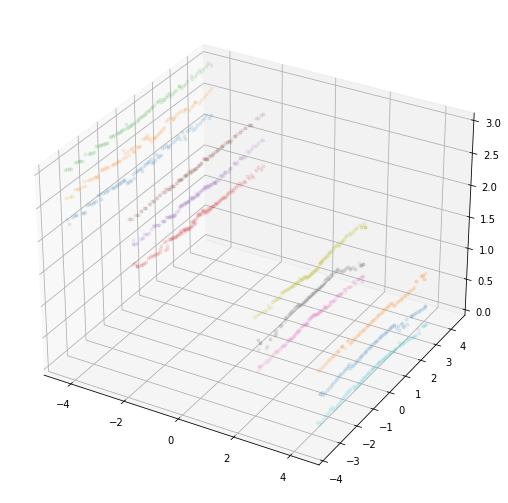

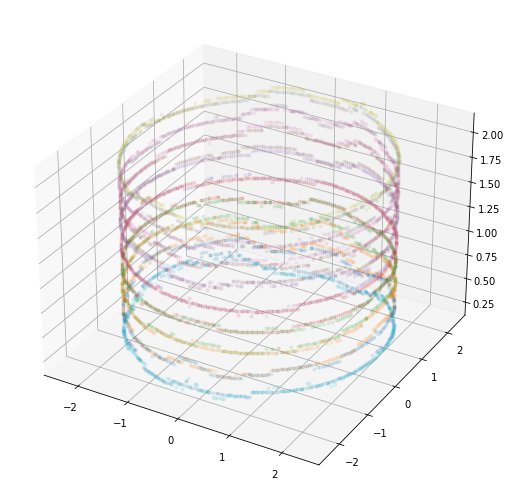

In [11]:
def plot_path(paths, ax):
    for i in range(paths.shape[0]):
        for j in range(paths.shape[1]):
            #dist from z axis, might need to fix
            path = paths[i,j]
            ax.plot(path[:,0], path[:,1], path[:,2], '.', alpha=.1)
            
for i in range(9): 
    ax = plt.figure(figsize=(9,9)).add_subplot(projection='3d')
    paths, path_meta, room_meta = load_paths(i, db_config)
    plot_path(paths,ax)

In [33]:
test = np.random.random(size=(100,3))-.5

In [34]:
np.maximum(test,0)

array([[0.        , 0.        , 0.        ],
       [0.08437837, 0.        , 0.37426744],
       [0.27078516, 0.        , 0.        ],
       [0.03946566, 0.        , 0.42538607],
       [0.        , 0.3329202 , 0.41463149],
       [0.        , 0.        , 0.        ],
       [0.        , 0.48998155, 0.31959979],
       [0.        , 0.34992772, 0.        ],
       [0.00270576, 0.        , 0.        ],
       [0.4948074 , 0.        , 0.        ],
       [0.14458015, 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.22688619, 0.39193619],
       [0.46826583, 0.47091142, 0.        ],
       [0.27122338, 0.        , 0.        ],
       [0.18459581, 0.        , 0.        ],
       [0.        , 0.15278073, 0.37720631],
       [0.49160516, 0.19216475, 0.1584279 ],
       [0.        , 0.        , 0.        ],
       [0.03096836, 0.        , 0.        ],
       [0.        , 0.39847992, 0.        ],
       [0.41261932, 0.02564808, 0.21395046],
       [0.